In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('column_2C_weka.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [5]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [6]:
df['class']=df['class'].apply(lambda x:1 if x=='Normal' else 0)
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


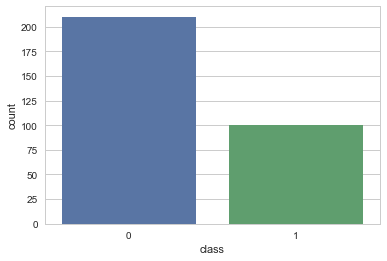

In [7]:
sns.set_style('whitegrid')
sns.countplot(df['class'])


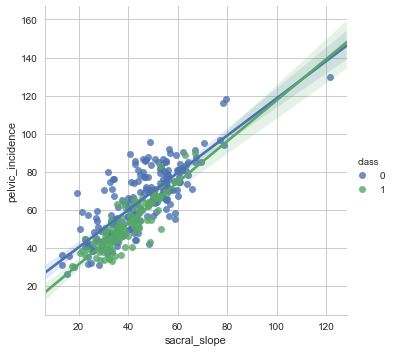

In [8]:
sns.lmplot('sacral_slope','pelvic_incidence',df,hue='class')

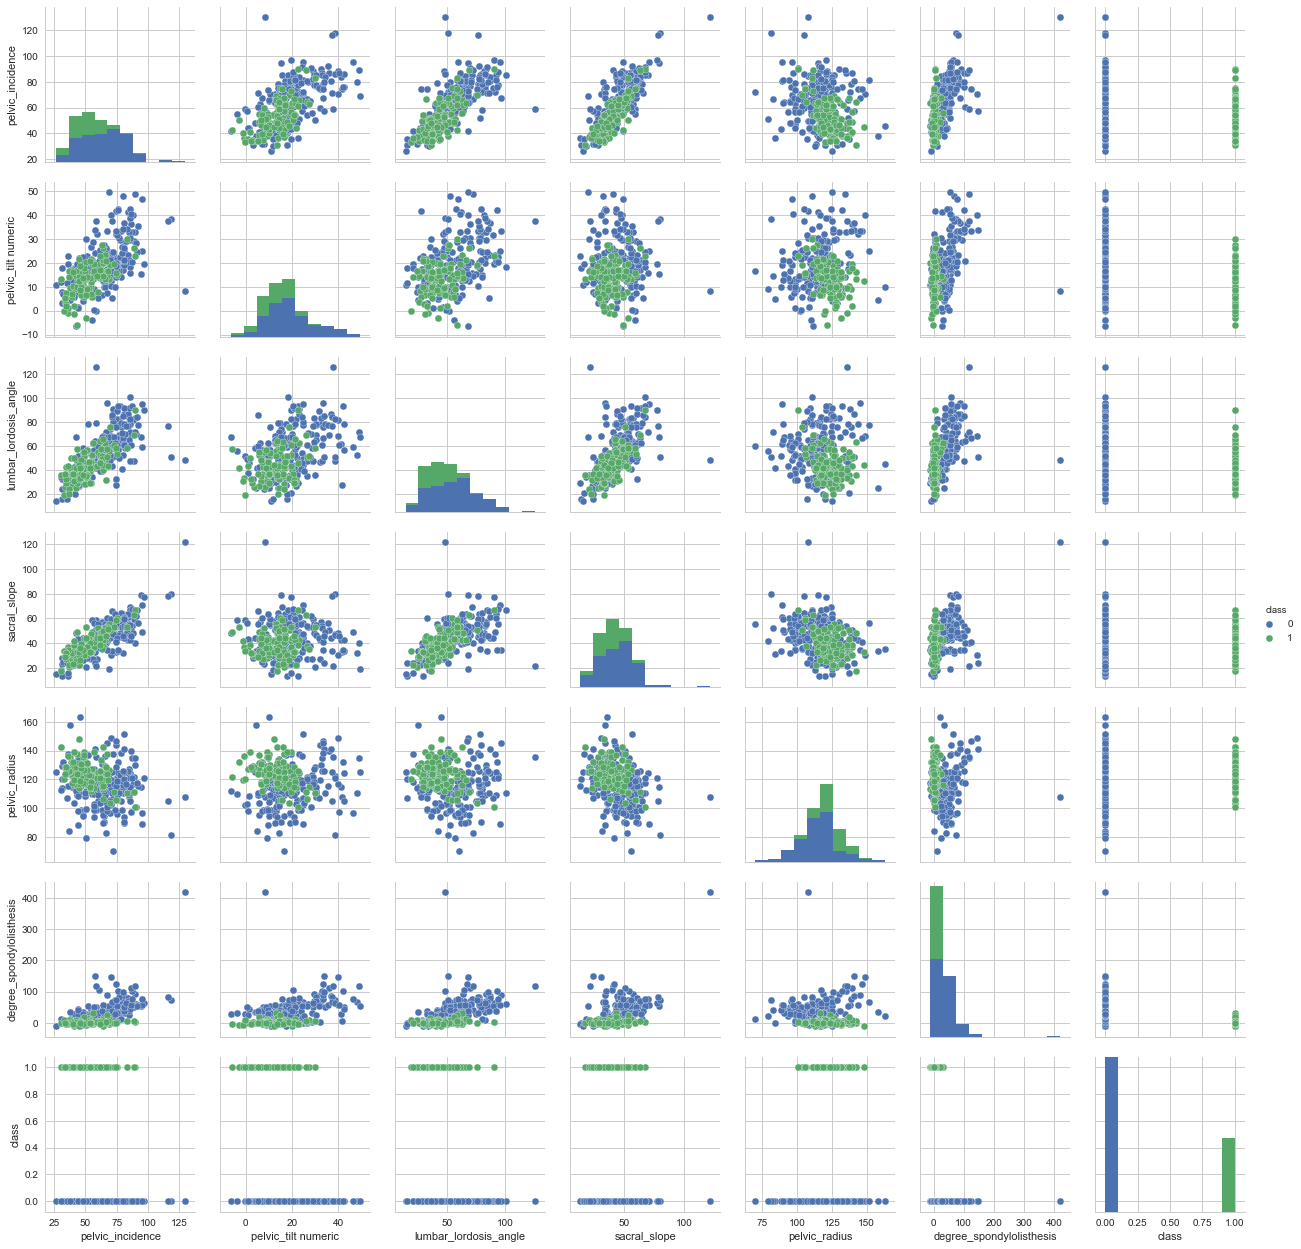

In [9]:
sns.pairplot(df,hue='class')

In [10]:
from sklearn.model_selection import train_test_split
X=df.drop('class',axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [11]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
predictions=lgr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.85      0.86        62
          1       0.72      0.74      0.73        31

avg / total       0.82      0.82      0.82        93



In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [14]:
rf_pred=rfc.predict(X_test)
print(classification_report(y_test,rf_pred))

             precision    recall  f1-score   support

          0       0.85      0.85      0.85        62
          1       0.71      0.71      0.71        31

avg / total       0.81      0.81      0.81        93



In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_features=scaler.transform(df.drop('class',axis=1))
df_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [18]:
knn_pred=knn.predict(X_test)
print(classification_report(y_test,knn_pred))

             precision    recall  f1-score   support

          0       0.88      0.84      0.86        62
          1       0.71      0.77      0.74        31

avg / total       0.82      0.82      0.82        93



In [19]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

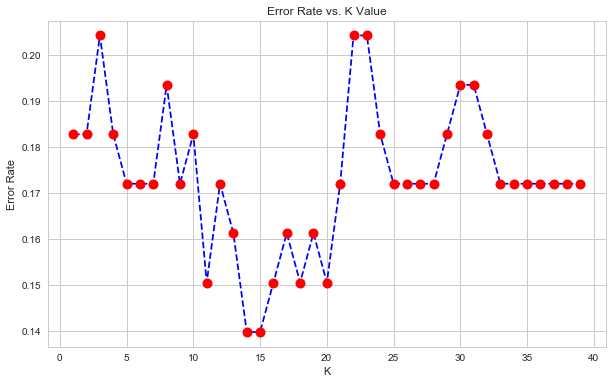

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
knn_25=KNeighborsClassifier(n_neighbors=25)
knn_25.fit(X_train,y_train)
knn25_pred=knn_25.predict(X_test)
print(classification_report(y_test,knn25_pred))

             precision    recall  f1-score   support

          0       0.93      0.81      0.86        62
          1       0.69      0.87      0.77        31

avg / total       0.85      0.83      0.83        93



In [22]:
knn_5=KNeighborsClassifier(n_neighbors=15)
knn_5.fit(X_train,y_train)
knn5_pred=knn_5.predict(X_test)
print(classification_report(y_test,knn5_pred))

             precision    recall  f1-score   support

          0       0.95      0.84      0.89        62
          1       0.74      0.90      0.81        31

avg / total       0.88      0.86      0.86        93



In [23]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.684932, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.680556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.680556, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.684932, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.680556, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.680556, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=10, gamma=0.1, kernel=rbf, score=0.680556, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.849315, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.750000, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.819444, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .... C=10, gamma=0.001, kernel=rbf, score=0.863014, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .... C=10, gamma=0.001, kernel=rbf, score=0.805556, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .... C=10, gamma=0.001, kernel=rbf, score=0.902778, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [24]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [25]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.89      0.90      0.90        62
          1       0.80      0.77      0.79        31

avg / total       0.86      0.86      0.86        93

